# BASIC IMAGE CLASSIFICATION 

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


## Loading the dataset
#### import mnist

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###### x_train, y_train, x_test, y_test areall numpy arrays

## Shapes of imported arrays

In [6]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


There are 60000 training examples and 10000 test examples in the dataset <br>
Each example has 28 rows and 28 columns<br>
That is, each image example is 28 pixels high and 28 pixels wide

## Plot an image example

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

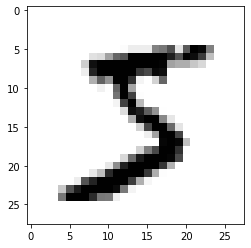

In [9]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

## Display Labels

In [10]:
y_train[0]

5

In [11]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## One Hot Encoding

After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0

#### Encoding Labels

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#### Validated Shapes

In [14]:
print("y_train_encoded shape:",y_train_encoded.shape)
print("y_test_encoded shape:",y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


#### Display Encoded Labels

In [15]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Neural Networks

This model will take 784 (28*28) dimensional vector as input and will output a 10 dimensional vector for the 10 classes<br>
We have converted the outputs to 10 dimensional one hot encoded vectors<br><br>
Now we will convert the inputs to the required format<br>
The shape of our inputs now is 28*28(each example has 28 rows ad 28 columns) and we want to change it to 784*1(or a list with 784 number set)

#### Unrolling N-dimensional arrays to vectors

In [17]:
import numpy as np

In [19]:
x_train_reshaped = np.reshape(x_train,(60000, 784)) #set the desired shape as the second argument
x_test_reshaped = np.reshape(x_test,(10000, 784))
print('x_train_reshaped shape:',x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


#### Data normalization

In [20]:
x_mean =np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

In [22]:
epsilon = 1e-10

In [23]:
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [25]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [26]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

#### Creating the model

We will use the sequential class to find in keras and add few layers to it<br><br>
We will use two hidden layers with 128 nodes each and one output layer with 10 nodes for the 10 classes<br><br>
All the layers will be dense layers(this means that all the nodes of a layers will be connected to all the nodes of the preceeding layer, that is they will be densely connected)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# We will use the sequential clas and pass down a list of layers
# When using the sequential class, the input layer is the input examples and we start by creating hidden layers 
model = Sequential([
    Dense(128, activation = 'relu', input_shape=(784,)),
    Dense(128, activation = 'relu'),# We dont need to define the input shape, because it is implied that what ever is the output of the dense layer will be the input of this dense layer
    #Finally the output layer has 10 nodes
    Dense(10, activation='softmax')
])

#### Activation Functions

Each node has the weighted sum of the previous layer<br>
The first step in the node is the linear sum of the inputs:<br>
Z = W.X +b<br>
The second step in the node is the activation function output:<br>
A=f(Z)<br>

'relu' activation function is a linear function for all the positive values and its set to 0 for all the negative values<br><br>
Another activation function used is 'softmax', it gives the probability scores for various nodes, in this case 10 nodes for the output layer and these probability scores sum up to 1<br>
Essentially this activation function gives us the probability for various classes given the input and the class with the highest probability gives the prediction<br><br>
We also need to define which algorith should the model use in order to optimise the weights and biases as per the given data, 

#### Compiling the model

In [29]:
model.compile(
    optimizer = 'sgd', #stochastic gradient descent
    loss = 'categorical_crossentropy', # difference between the predicted outputs and the actual outputs given in the dataset, this is the function we need to minimise to get a highly accurate model when we train the model
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [30]:
model.fit(x_train_norm, y_train_encoded, epochs=3) # We are going through every example just 3 times


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3686 - accuracy: 0.8929
Epoch 2/3
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1825 - accuracy: 0.9469
Epoch 3/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1382 - accuracy: 0.9593


#### Evaluating the model

In [36]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy*100)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set accuracy: 95.93999981880188


#### Predictions on the test set

In [37]:
preds = model.predict(x_test_norm)
print("Shape of preds:", preds.shape)

Shape of preds: (10000, 10)


#### Plotting the results

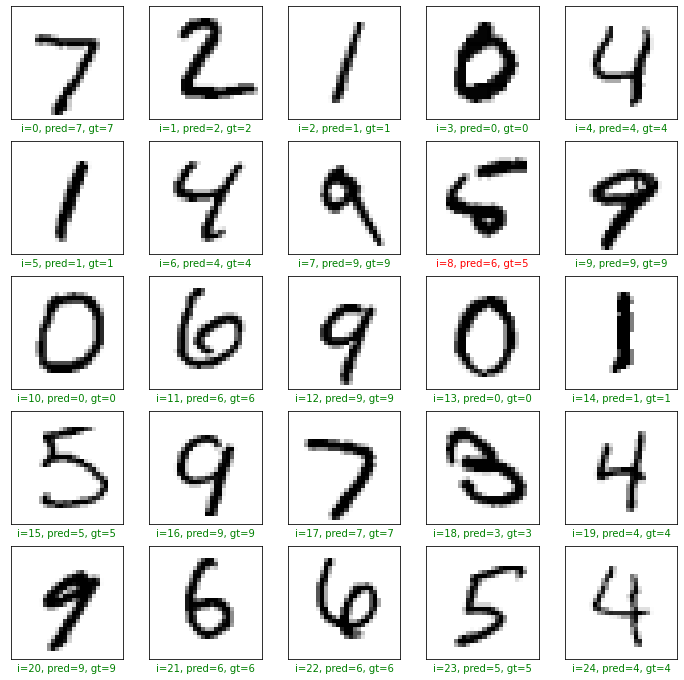

In [39]:
plt.figure(figsize=(12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred!= gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color =col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

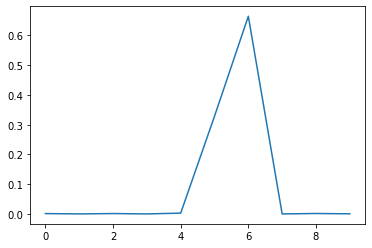

In [40]:
plt.plot(preds[8])
plt.show()